In [1]:
from stat3007_timeseries_forecasting.utils import get_data_dir
import pandas as pd
import torch


model_path = get_data_dir() + 'weights/tuesday/1DConv_b128_num_epochs50.pth'

device = torch.device("cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu"))
print(f"Using device: {device}")

model = torch.load(model_path, map_location=device)
model.device = device
print(model.device)

Using device: mps
mps


In [2]:
from stat3007_timeseries_forecasting.utils import get_sequences_multiple_tickers
from stat3007_timeseries_forecasting.dataset import SequenceDataset
from torch.utils.data import DataLoader
df = pd.read_csv(get_data_dir() + 'energy_sector_dataset.csv')

train_sequences, test_sequences = get_sequences_multiple_tickers(df, input_sequence_length=100, train_percentage=0.8)

In [3]:
test_set = SequenceDataset(train_sequences)
test_loader = DataLoader(test_set, batch_size=289)

model.eval()
with torch.no_grad():
    for i, batch in enumerate(test_loader):
        input = batch[:, :-5,].to(device)
        input = input.unsqueeze(dim=-1)

        outputs = model(input)

In [4]:
outputs_list = outputs.tolist()
predictions = outputs_list

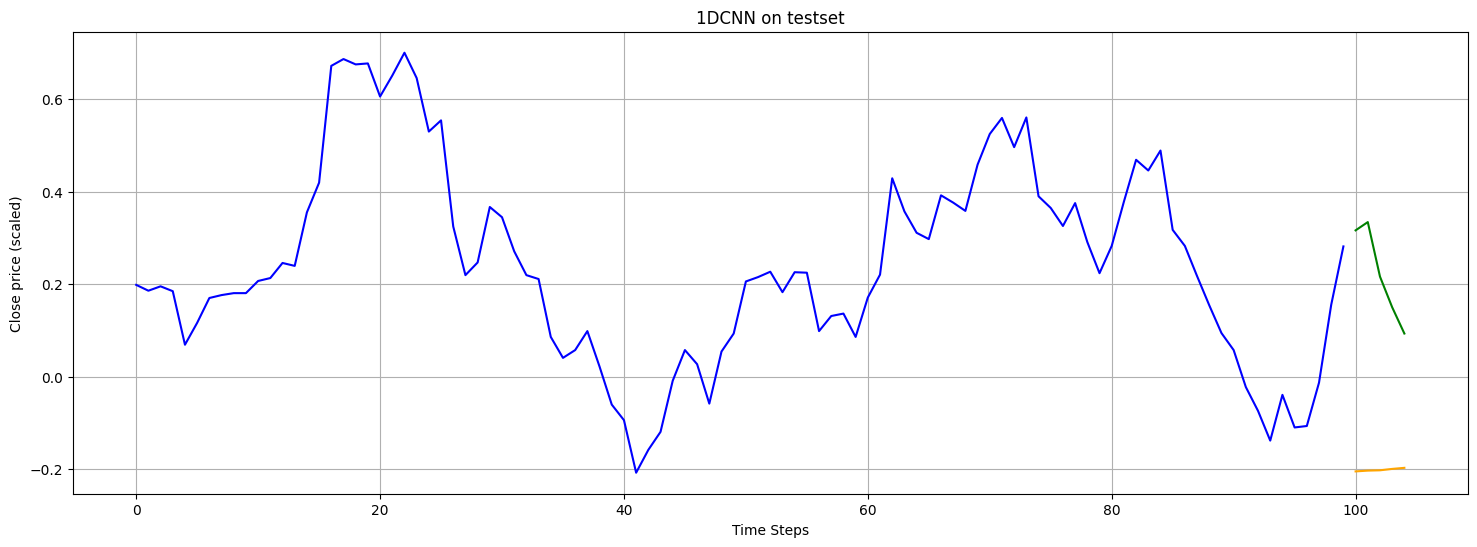

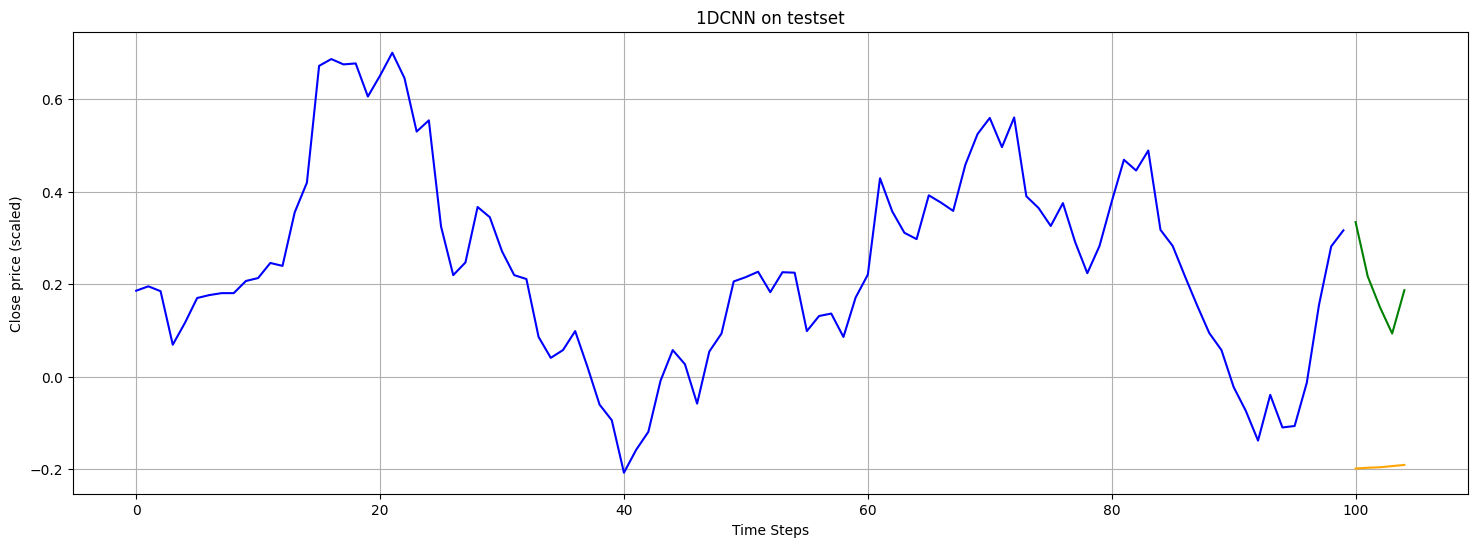

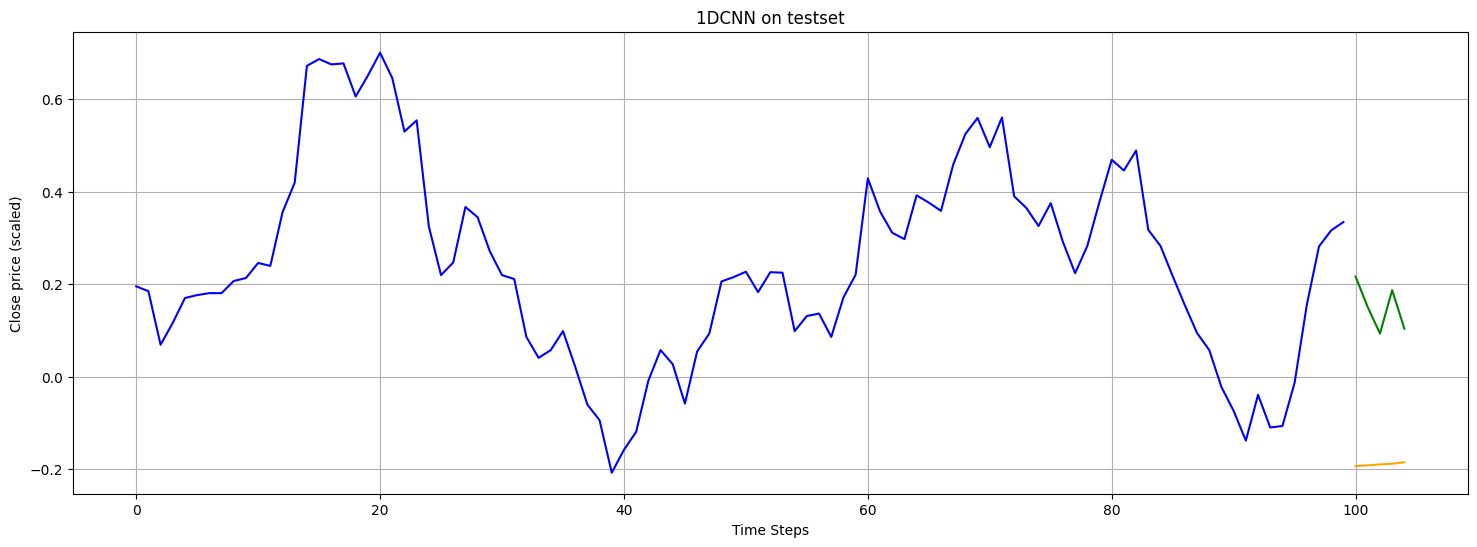

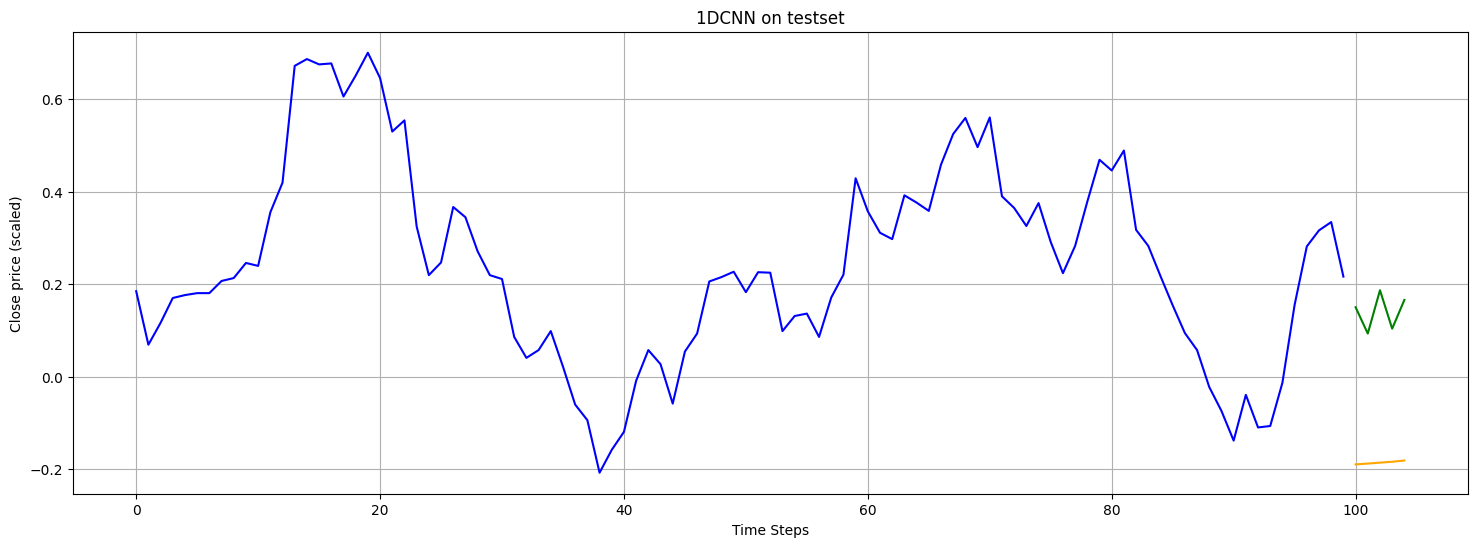

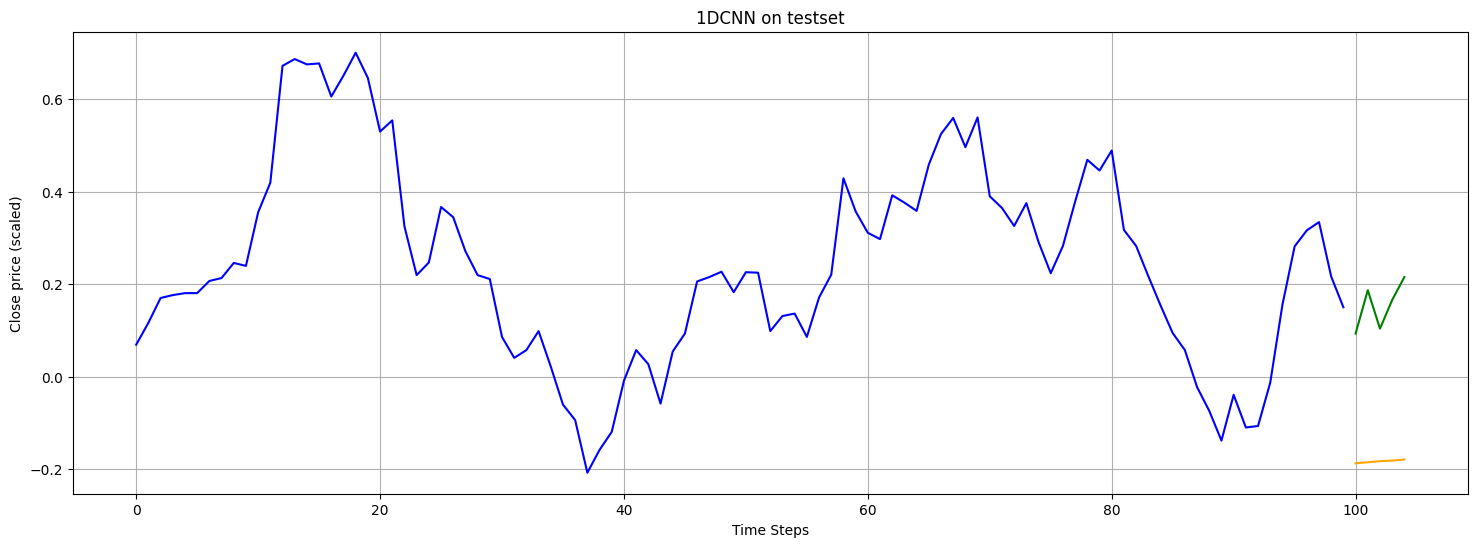

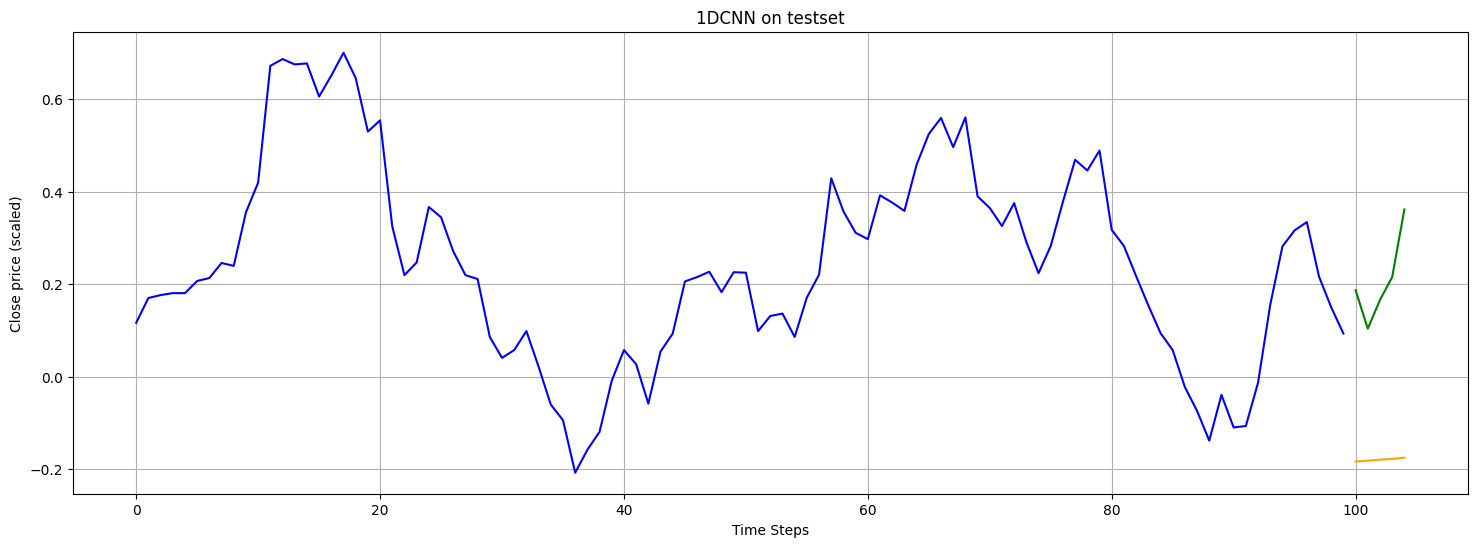

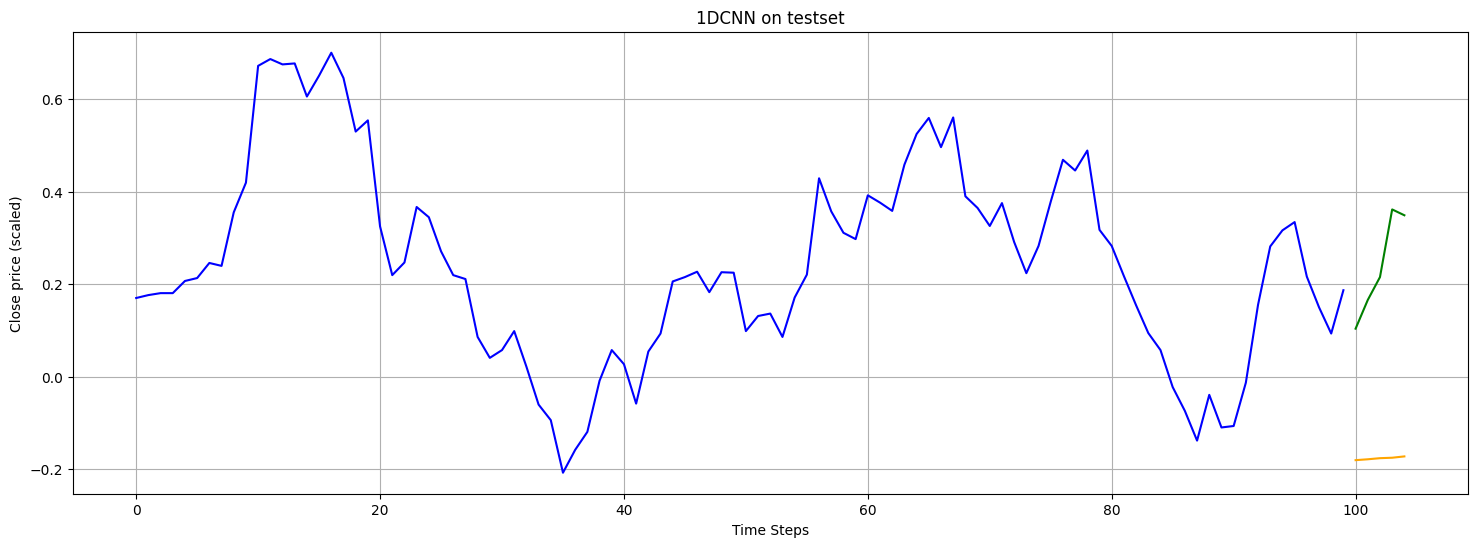

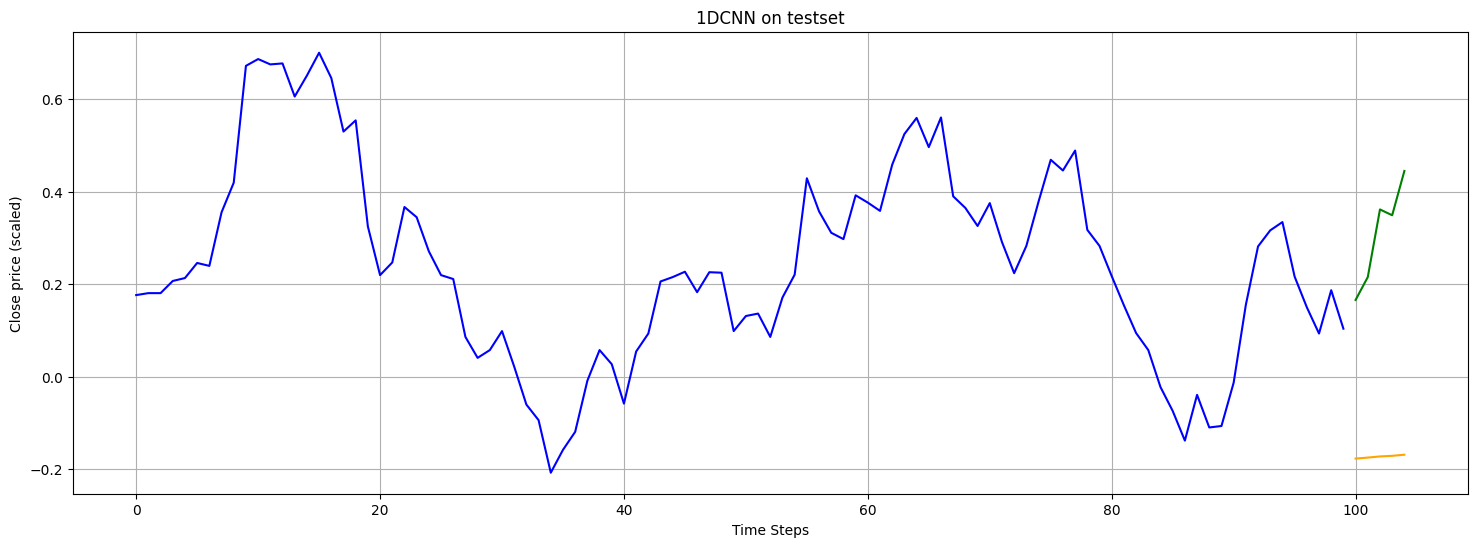

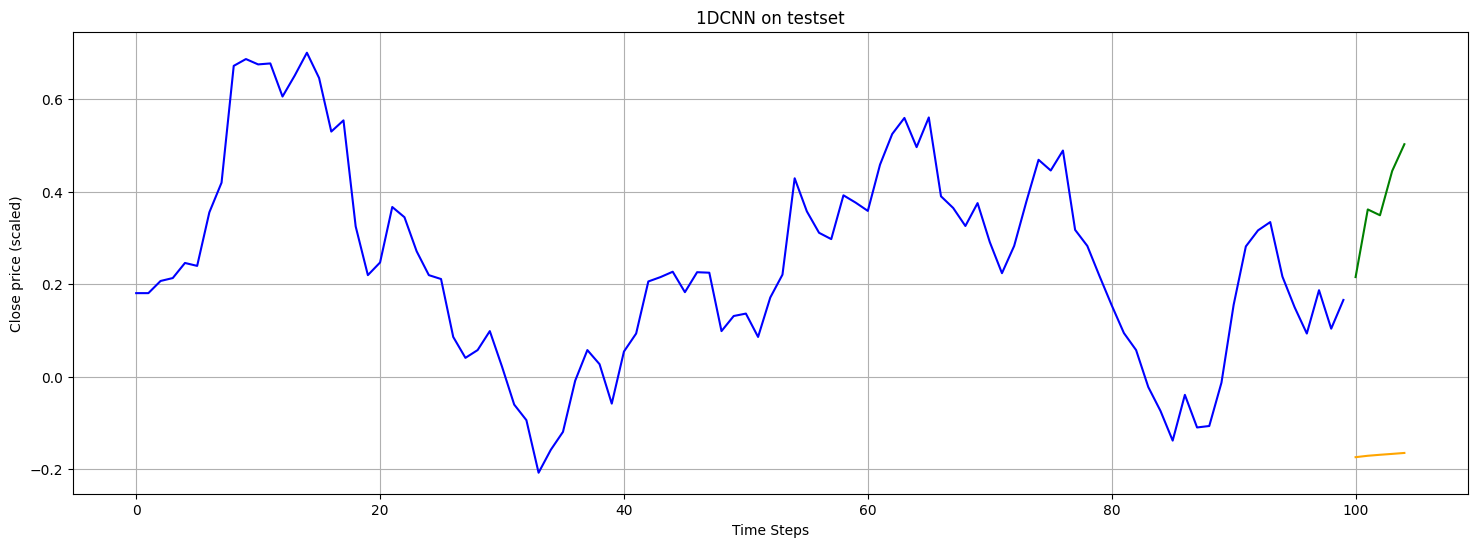

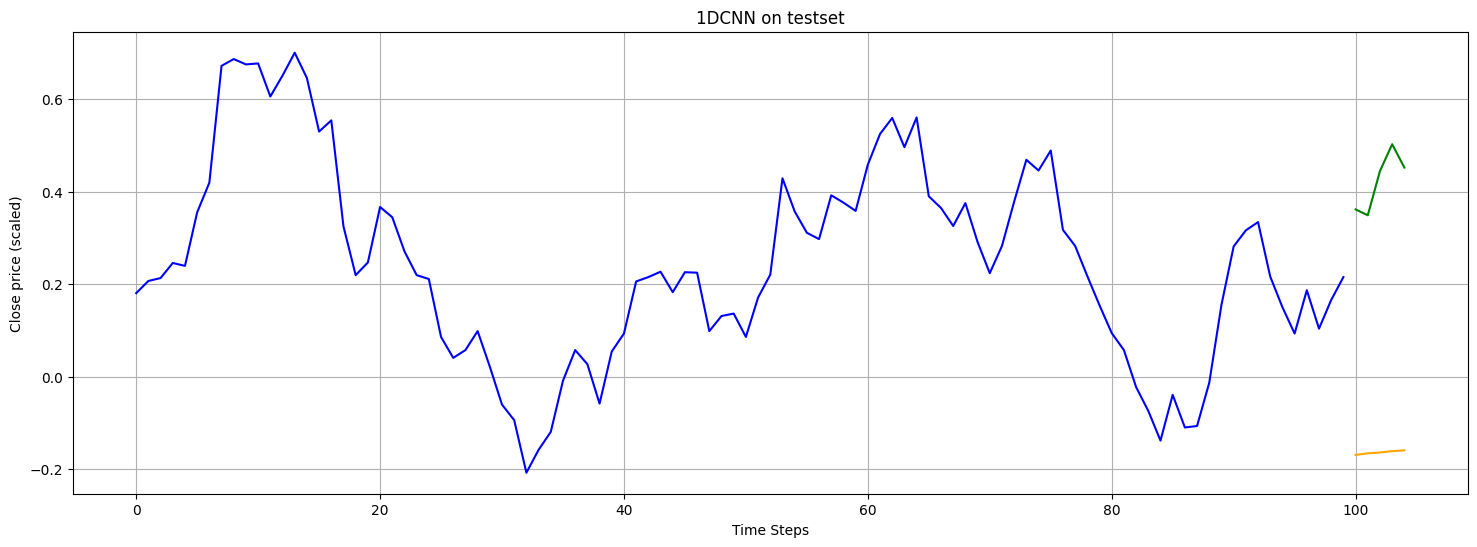

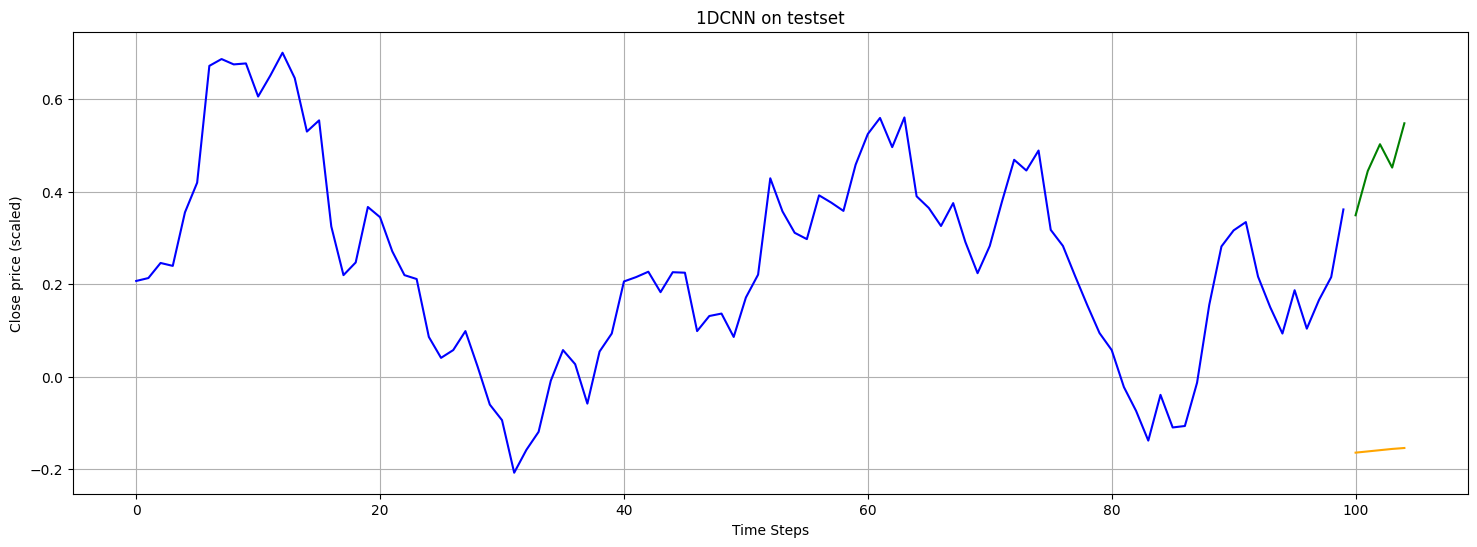

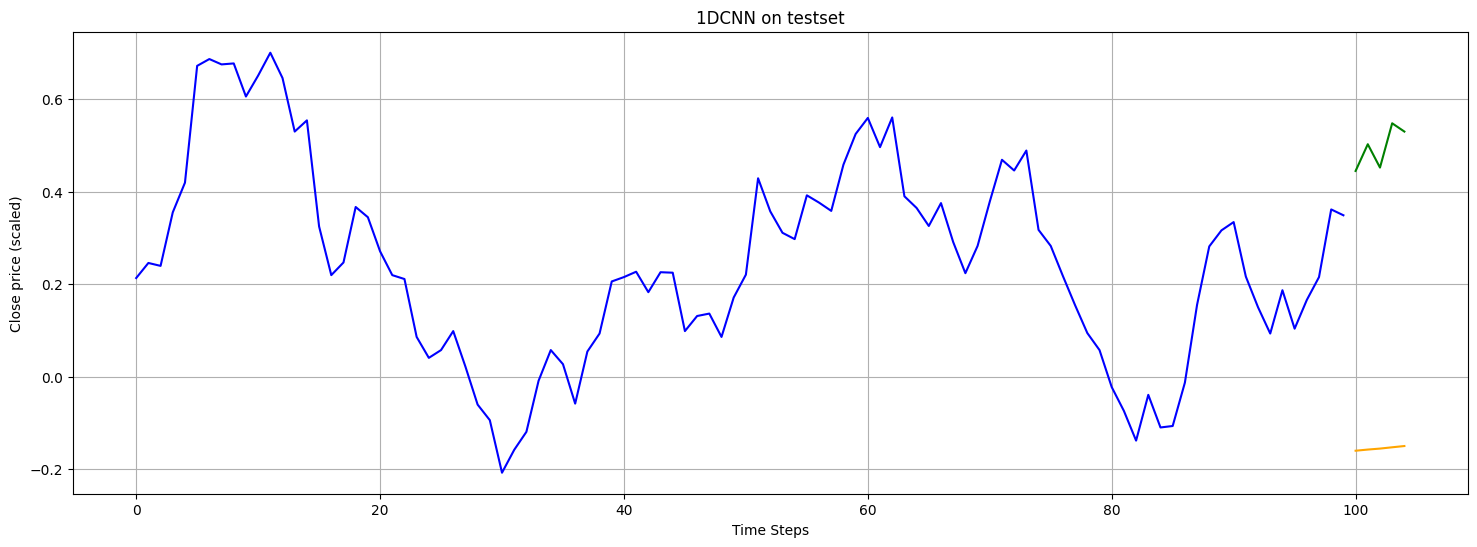

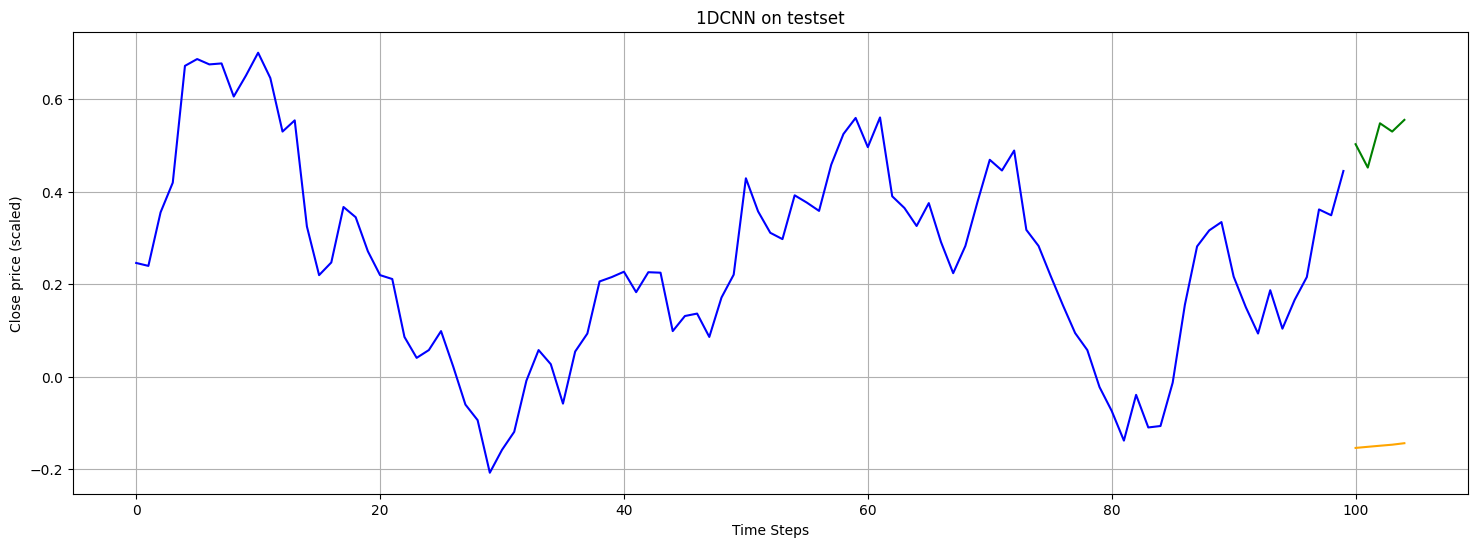

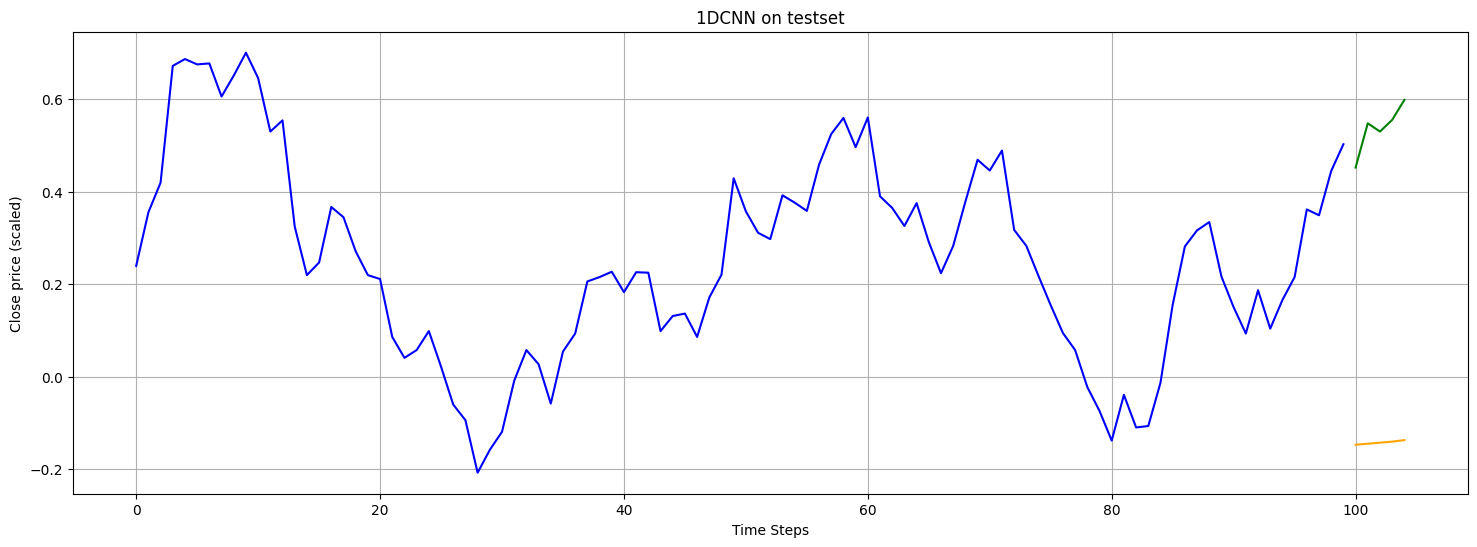

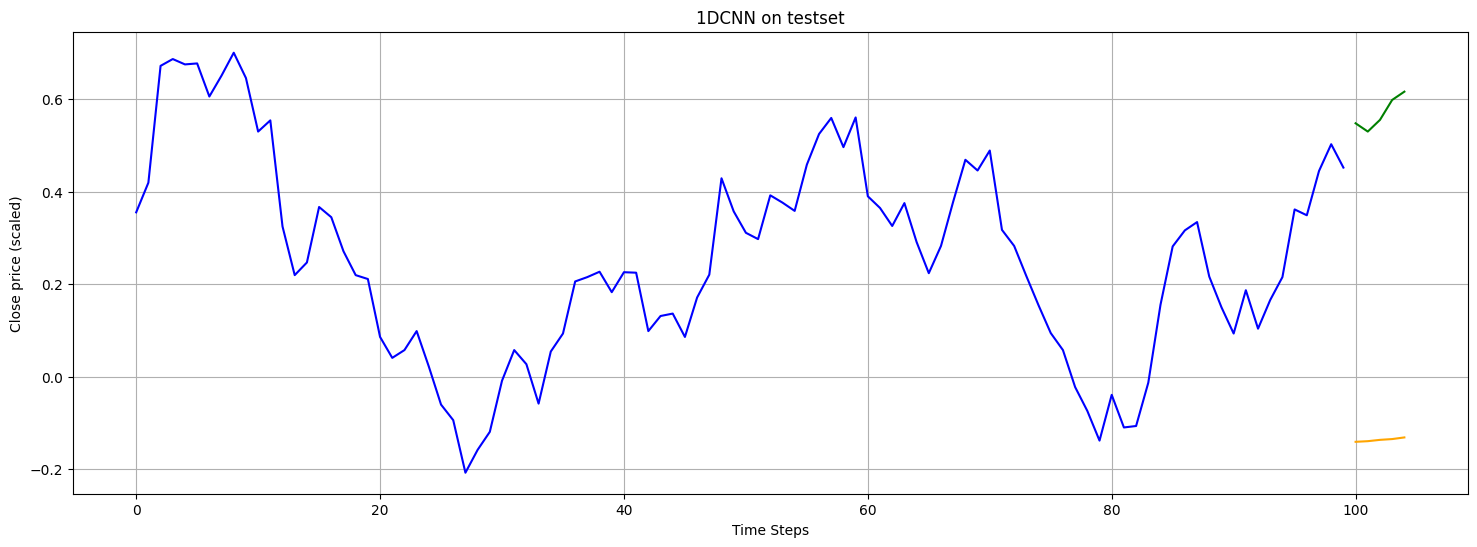

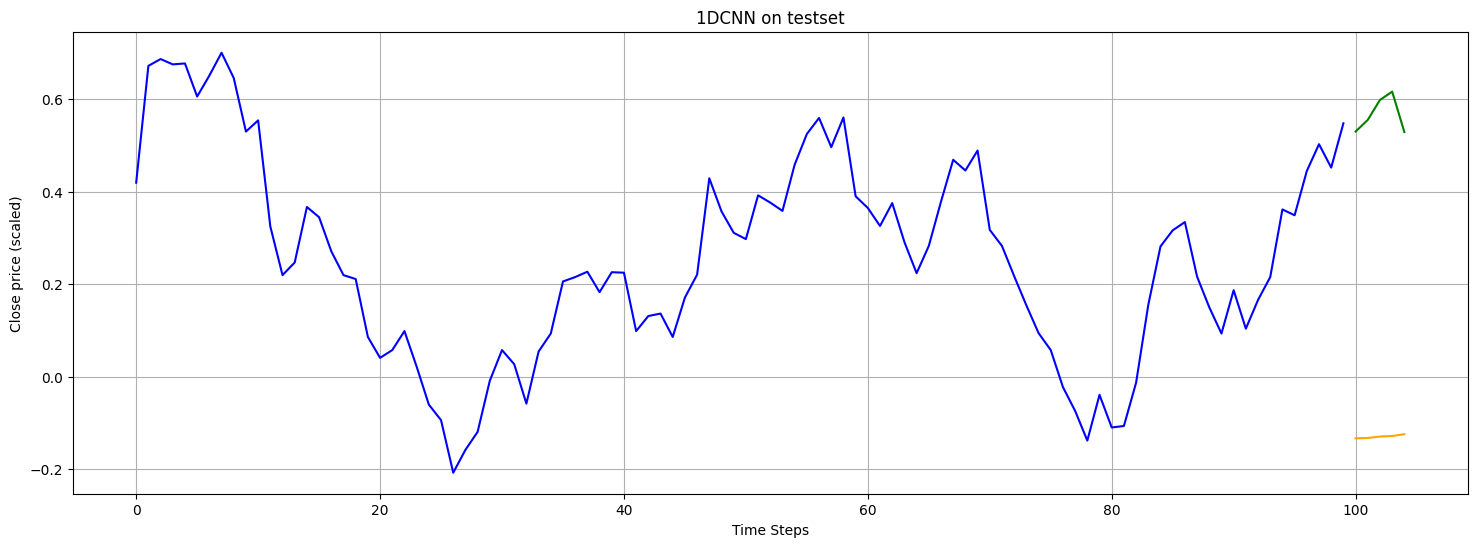

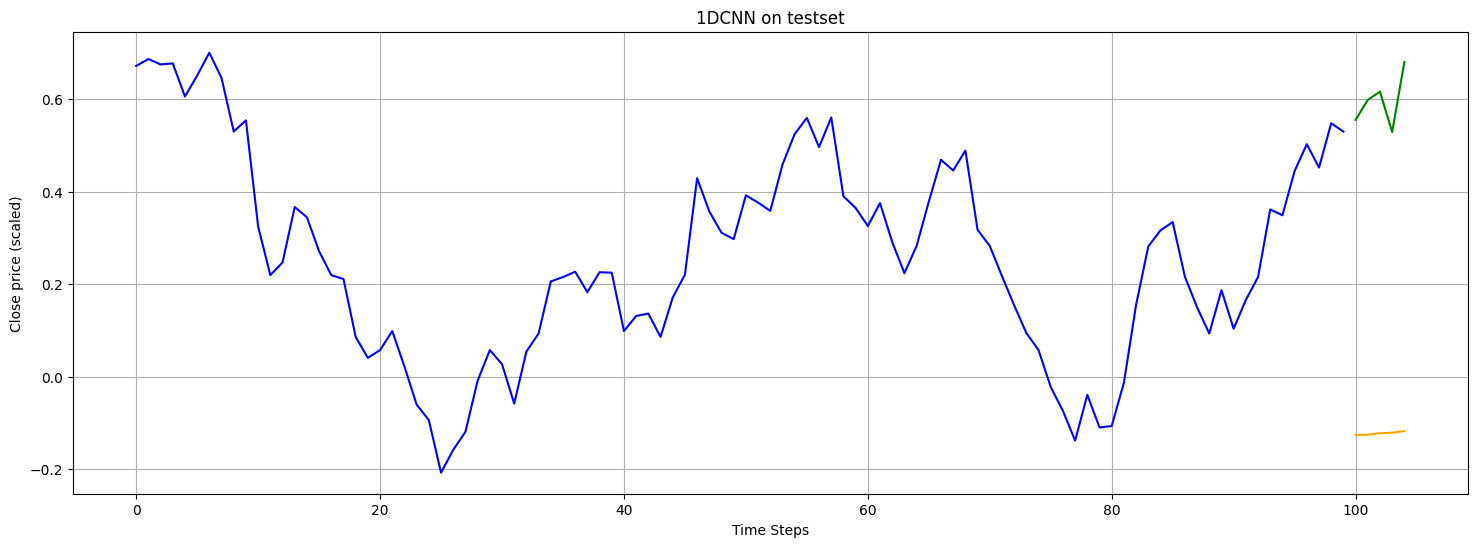

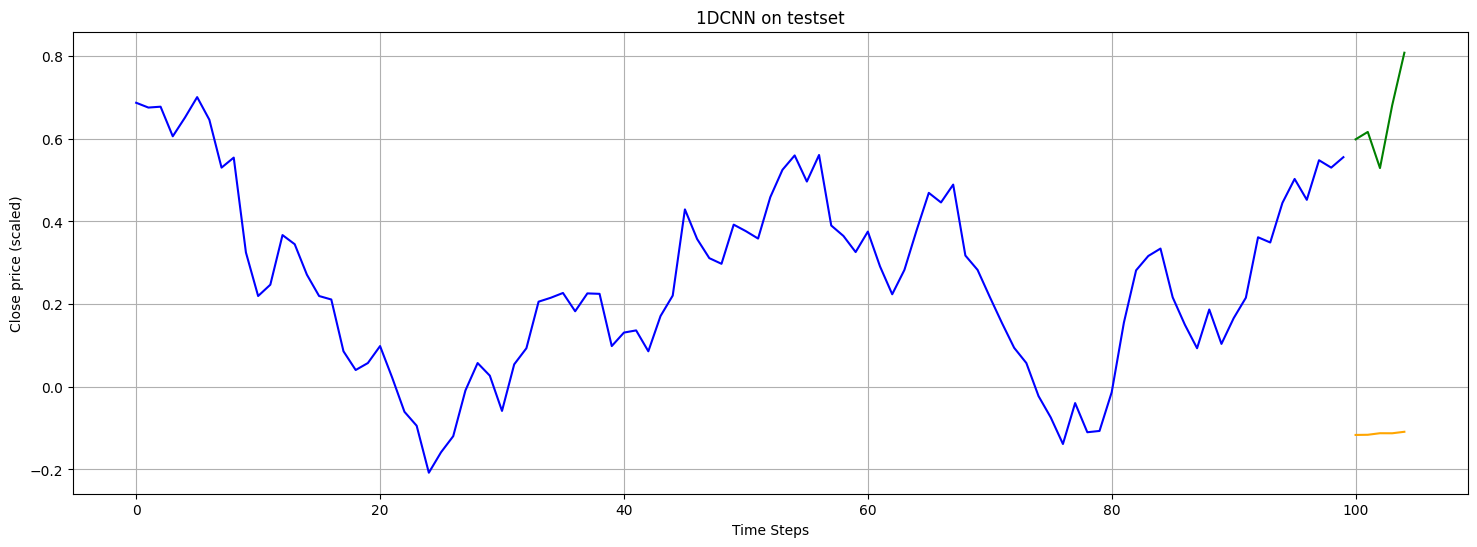

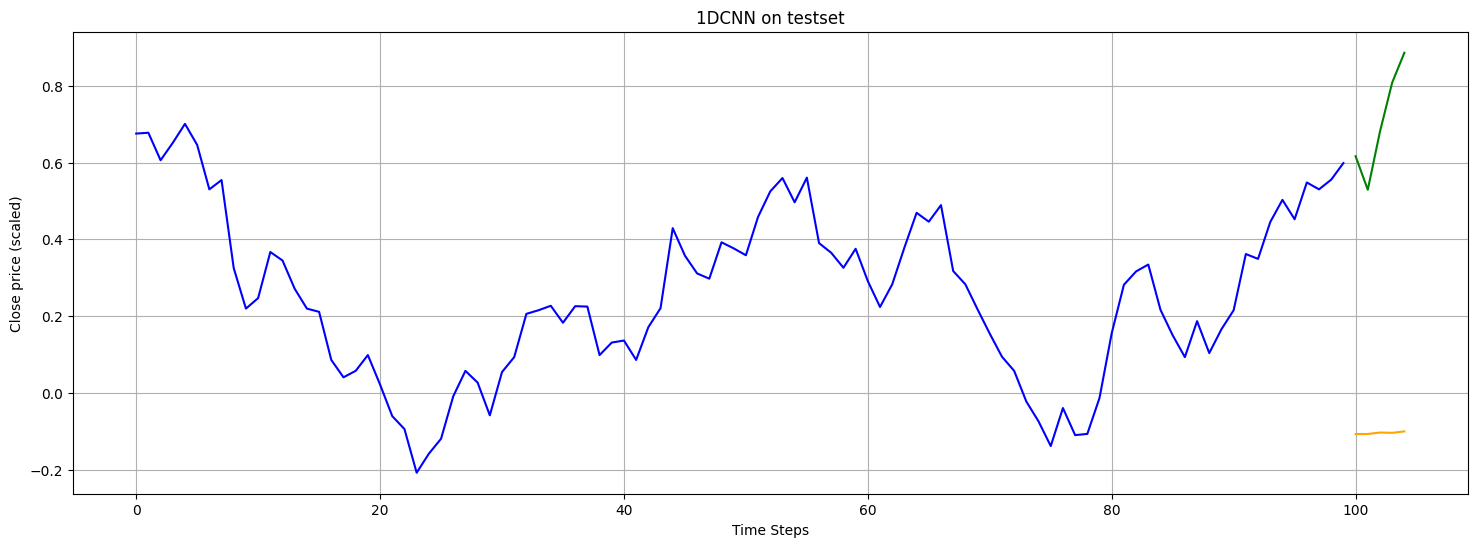

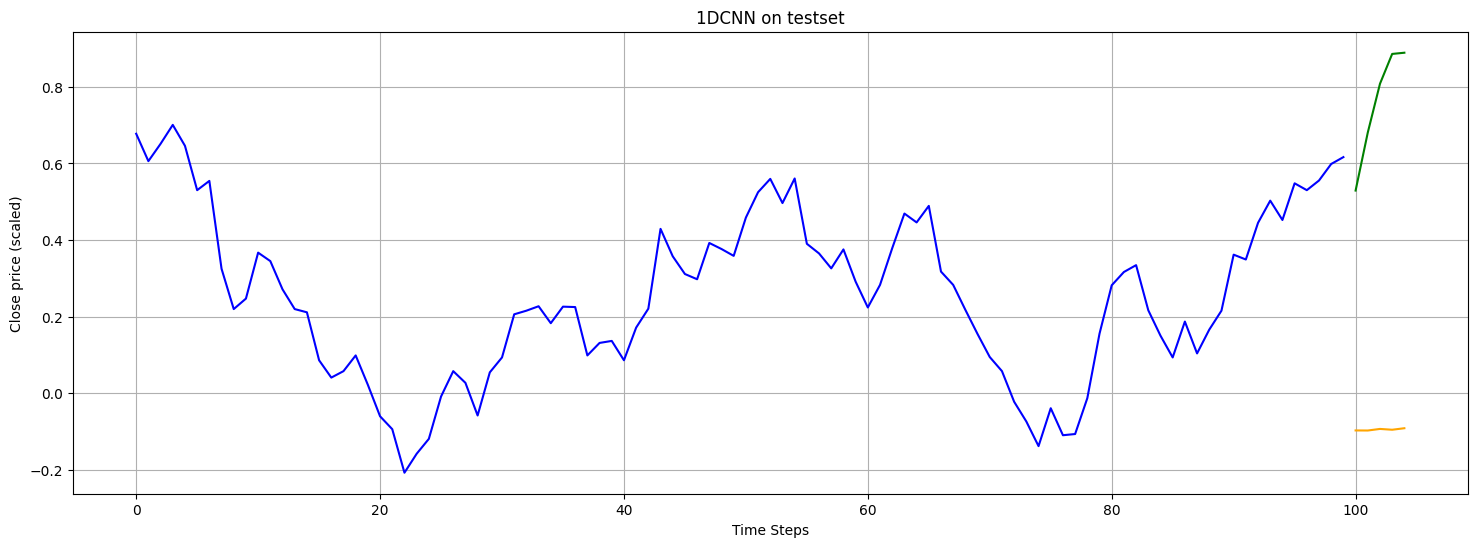

In [5]:
import numpy as np
import matplotlib.pyplot as plt

for i, input_sequence in enumerate(train_sequences[0:20]):
    plt.figure(figsize=(18, 6))  # Width is 12 inches, height is 6 inches
    x_array_offset = np.arange(len(input_sequence) - 5, len(input_sequence))  # Used for both target and predictions when plotting
    plt.plot(
            input_sequence[: len(input_sequence) - 5],
            color="blue",
            label="Input data",
        )

    plt.plot(
        x_array_offset,
        input_sequence[len(input_sequence) - 5 :],
        color="green",
        label="Target data",
    )
    plt.plot(
        x_array_offset, predictions[i], color="orange", label="Prediction"
    )
    plt.title("1DCNN on testset")
    plt.xlabel("Time Steps")
    plt.ylabel("Close price (scaled)")
    plt.grid(True)